In [37]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab

import IPython.display as ipd

from microfaune import audio
from microfaune import plot

# List of species

In [38]:
file = open('list_full_names.txt', 'r', encoding='utf-8')
file.readline()
list_full_names = file.read()
list_full_names = list_full_names.split('\n')
file = open('list_file_names.txt', 'r')
file.readline()
list_file_names = file.read()
list_file_names = list_file_names.split('\n')

# Select specie

Accenteur mouchet


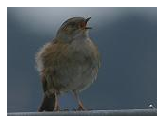

In [39]:
i = 0    # select index in the species list
full_name = list_full_names[i]
file_name = list_file_names[i]
print(full_name)

try:
    im = img.imread('images/'+file_name+'.png')
    plt.imshow(im)
    plt.axis('off')
except:
    print('No audio found for this specie')
    im = img.imread('images/drawing_bird.png')
    plt.imshow(im)
    plt.axis('off')

# Listen to audio

In [40]:
ipd.Audio('audio/'+file_name+'.wav')

# Load audio

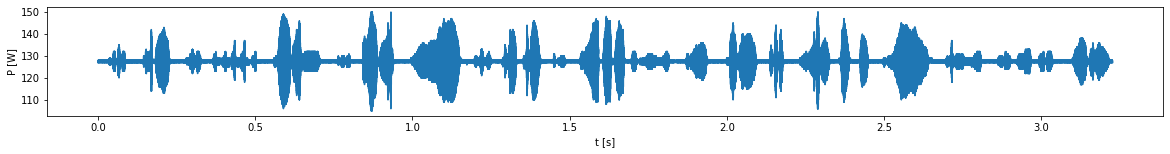

In [41]:
fs, data = audio.load_wav('audio/'+file_name+'.wav')
plot.plot_audio(fs, data)

# Create Mel Spectrogram from the audio

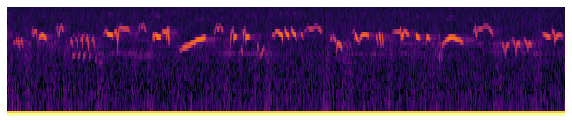

In [48]:
# From Cakir
N_MELS = 40
# MEL spec from STFT 40 ms and 20 ms overlap
N_FFT = int(0.01 * fs) + 1
HOP_LEN = int(0.005 * fs) + 1
    
shape_data=np.shape(data)
if (len(shape_data) == 1):   # only one channel
    S = audio.create_spec(data, fs, N_MELS, N_FFT, HOP_LEN)
else:                        # more than one channel
    S = audio.create_spec(np.sum(data, axis=1), fs, N_MELS, N_FFT, HOP_LEN)
        
pylab.rcParams['figure.figsize'] = (20, 2)
plot.plot_spec(S)
plt.savefig('spectrogrammes/'+file_name+'.png')